In [1]:
cd ..

/Users/kaancaylan/Desktop/HEC/Algorithmic Fairness and Explainability/interpretability_fairness_project


In [6]:
from src.main import main 

model_params = {
            "max_depth":5, "tree_method":"hist", "device":"cuda",
            "objective":"binary:logistic","eval_metric":"auc",
            "random_state":42,"importance_type":"gain"}
            
main(model_path="models/xgb_gain.pkl", val_split=False, **model_params)

Loading data ...
Encoding variables ...
Training ...
The individual scores are:[0.83618164 0.88110352 0.90209961 0.8815918  0.9014555 ]
The mean cross validation score is:0.8804864124761395


In [7]:
import shap
import pandas as pd
import numpy as np
import lime
import pickle
from src.train import load_model
from src.load import load
from src.preprocess import preprocess

In [8]:
# Load Model
model = load_model("models/xgb_cover.pkl")
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type='cover',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# XGBoost feature importances

In [9]:
model_cover = load_model("models/xgb_cover.pkl")
cover = pd.Series(model_cover.feature_importances_, model_cover.feature_names_in_, name="cover")
cover

A1_Score                             0.009062
A2_Score                             0.012596
A3_Score                             0.034161
A4_Score                             0.061012
A5_Score                             0.012344
                                       ...   
relation=Health care professional    0.000000
relation=Others                      0.000000
relation=Parent                      0.000000
relation=Relative                    0.000000
relation=Self                        0.008354
Name: cover, Length: 91, dtype: float32

In [10]:
model_weight = load_model("models/xgb_weight.pkl")
weight = pd.Series(model_weight.feature_importances_, model_weight.feature_names_in_, name="weight")

In [11]:
model_gain = load_model("models/xgb_gain.pkl")
gain = pd.Series(model_gain.feature_importances_, model_gain.feature_names_in_, name="gain")

<Axes: title={'center': 'Different Types of Feature Importances'}>

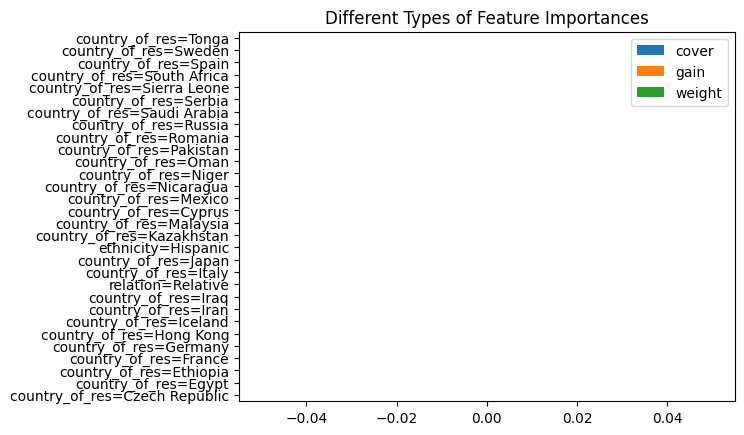

In [13]:
importances = pd.concat([cover, gain, weight], axis=1)
importances.sort_values(by="gain").plot(kind="barh", title="Different Types of Feature Importances")

# SHAP

In [4]:
import src.explanability as exp

Loading data ...
Encoding variables ...


In [6]:
# Load Data
df = load("data/train.csv")
X, y = preprocess(df)

Loading data ...
Encoding variables ...


In [9]:
for col in X.columns:
    display(X[col].value_counts())

A1_Score
1    448
0    352
Name: count, dtype: int64

A2_Score
1    424
0    376
Name: count, dtype: int64

A3_Score
0    440
1    360
Name: count, dtype: int64

A4_Score
0    468
1    332
Name: count, dtype: int64

A5_Score
0    484
1    316
Name: count, dtype: int64

A6_Score
0    557
1    243
Name: count, dtype: int64

A7_Score
0    482
1    318
Name: count, dtype: int64

A8_Score
1    407
0    393
Name: count, dtype: int64

A9_Score
0    404
1    396
Name: count, dtype: int64

A10_Score
1    494
0    306
Name: count, dtype: int64

age
38.172746    1
9.349183     1
26.412616    1
20.258796    1
61.860473    1
            ..
47.284149    1
11.029966    1
16.626307    1
33.123913    1
46.966113    1
Name: count, Length: 800, dtype: int64

gender
1    530
0    270
Name: count, dtype: int64

ethnicity
10    257
0     203
5      97
1      67
2      47
8      34
7      32
6      29
4      17
3       9
9       5
11      3
Name: count, dtype: int64

jaundice
0    615
1    185
Name: count, dtype: int64

autism
0    669
1    131
Name: count, dtype: int64

country_of_res
54    134
25    108
36     78
53     67
31     55
52     40
6      37
15     30
0      22
35     20
7      18
48     17
13     12
47     10
21     10
32     10
28      9
26      8
42      7
46      6
29      6
9       6
33      6
55      5
40      4
16      4
34      4
37      4
4       4
8       4
27      4
5       4
43      4
1       4
12      3
44      3
20      3
24      3
22      3
51      3
38      3
17      2
49      2
39      2
11      1
41      1
14      1
18      1
19      1
2       1
45      1
30      1
3       1
50      1
23      1
10      1
Name: count, dtype: int64

used_app_before
0    750
1     50
Name: count, dtype: int64

result
 6.351166     1
 13.842880    1
 12.649432    1
-0.158828     1
-0.115811     1
             ..
 1.629858     1
 12.976983    1
 12.323881    1
-0.529654     1
 2.243304     1
Name: count, Length: 800, dtype: int64

age_desc
0    800
Name: count, dtype: int64

relation
5    709
0     40
3     29
4     18
2      2
1      2
Name: count, dtype: int64

In [28]:
model = load_model("models/xgb.pkl")

In [29]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


In [30]:
# Split X and y to train and test, only run if model is trained with train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
shap_values_test = explainer.shap_values(X_test)

In [31]:
print(X.shape, y.shape)

(800, 20) (800,)


## Summary Plot

- Explore why high test results sometimes lead to model predicting low values for autism

In [ ]:
E

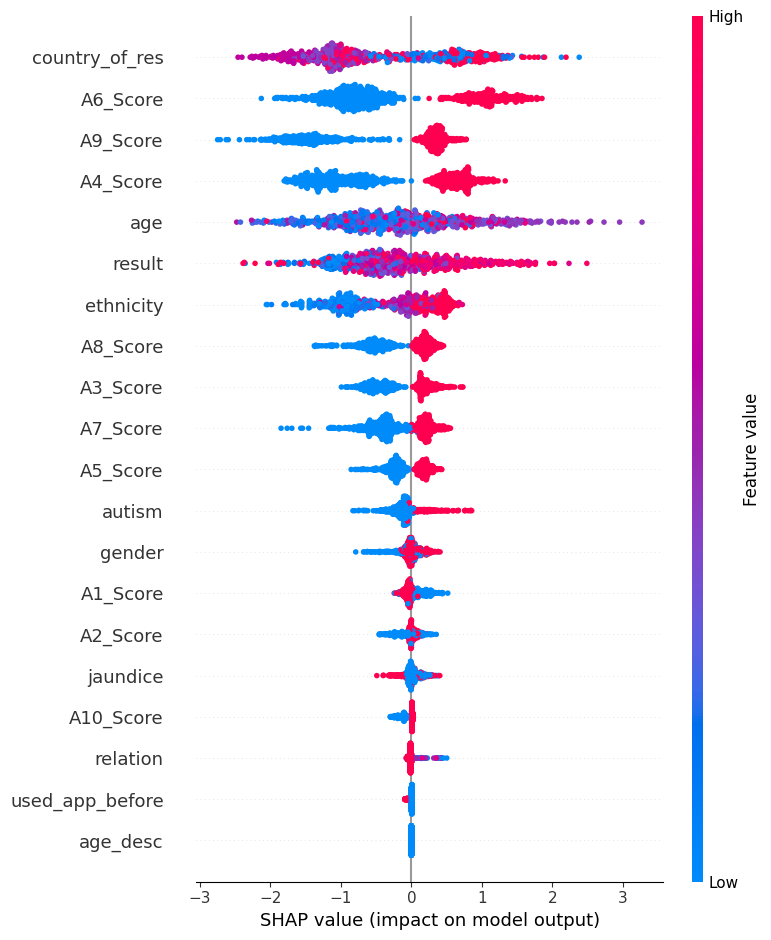

In [32]:
shap.summary_plot(shap_values, X, feature_names=X.columns)

## Decision Plot

In [15]:
shap_values

(800, 20)

In [17]:
X_test

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
696,0.871089,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13.927242,0.0,0.909091,0.0,0.0,0.636364,0.0,13.332323,1.0
667,0.834793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.690527,1.0,1.000000,0.0,0.0,0.454545,0.0,6.479508,0.8
63,0.078849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.056911,1.0,0.454545,0.0,0.0,0.454545,0.0,14.772424,1.0
533,0.667084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.921807,1.0,0.000000,0.0,0.0,0.127273,0.0,9.656317,1.0
66,0.082603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,16.332645,0.0,0.636364,0.0,0.0,0.527273,0.0,1.388938,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.737171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.732244,1.0,0.000000,0.0,0.0,0.454545,0.0,1.963125,1.0
798,0.998748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.414305,0.0,0.000000,0.0,0.0,0.272727,0.0,9.069342,1.0
744,0.931164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.180865,0.0,0.000000,1.0,0.0,0.872727,0.0,11.750335,1.0
513,0.642053,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.854624,0.0,0.181818,0.0,0.0,0.636364,0.0,5.299168,1.0


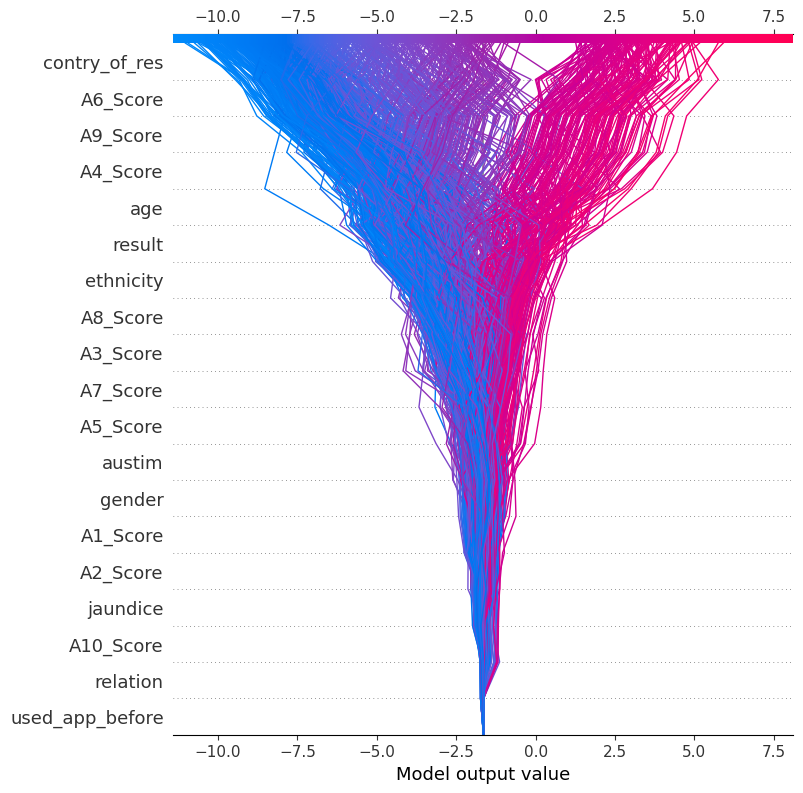

In [11]:
shap.decision_plot(base_value=explainer.expected_value, 
                   shap_values=shap_values, 
                   features=X, 
                   feature_names=X.columns.to_list(),
                   feature_order="importance")

## Dependence Plots

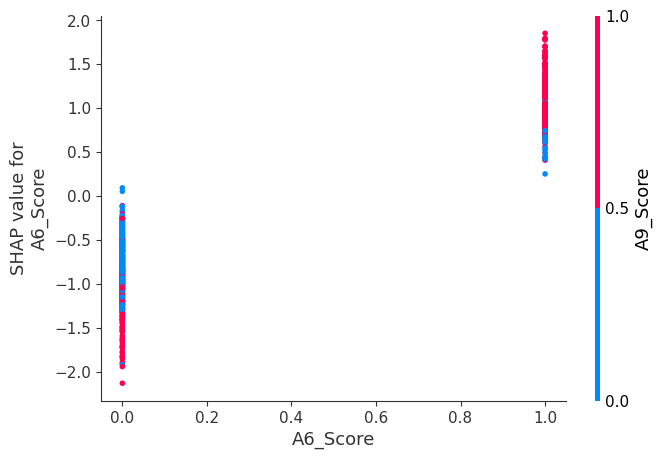

In [23]:
exp.dependence_plot("A6_Score")

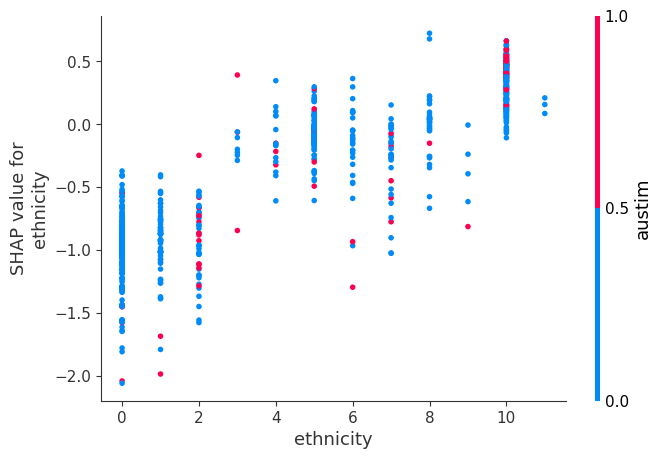

In [24]:
exp.dependence_plot("ethnicity", "austim")

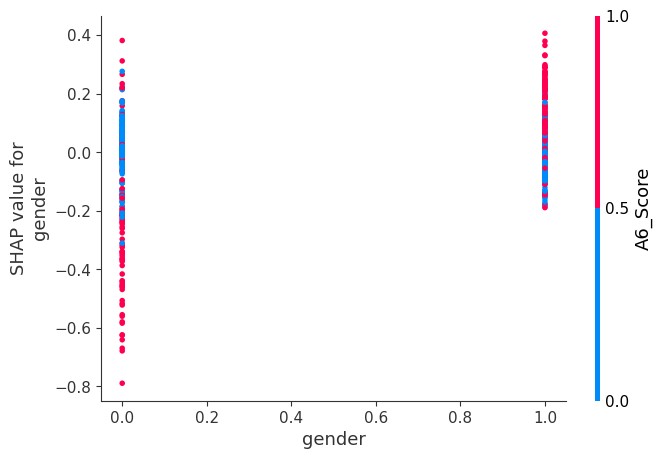

In [25]:
exp.dependence_plot("gender")

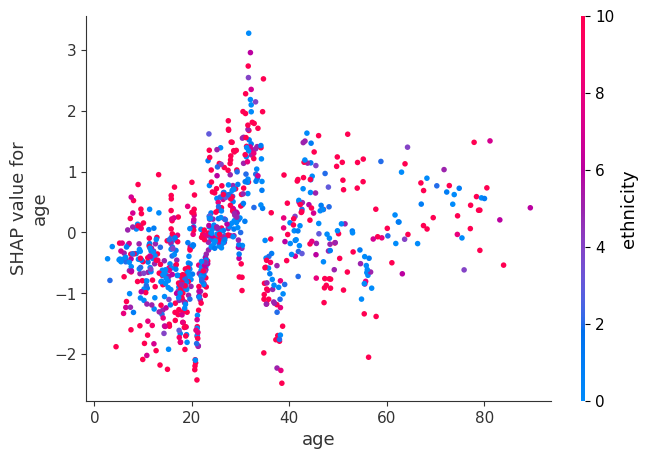

In [26]:
exp.dependence_plot("age", "ethnicity")

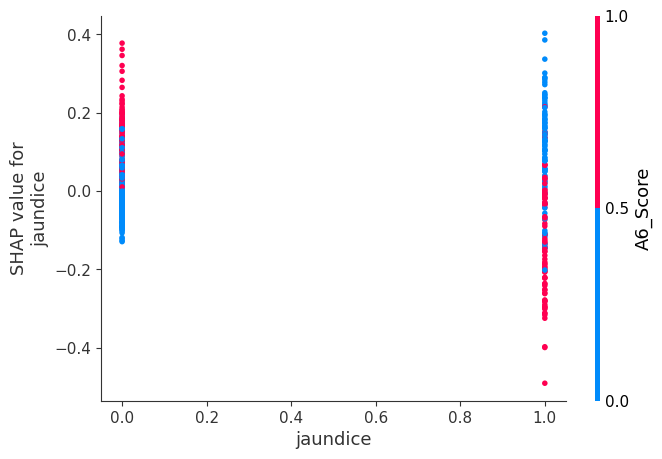

In [27]:
exp.dependence_plot("jaundice")

In [10]:
df_raw = pd.read_csv("data/train.csv")
df_raw["ethnicity"].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [19]:
df_raw.replace("?", np.nan)["ethnicity"].value_counts().index

Index(['White-European', 'Middle Eastern ', 'Asian', 'Black', 'South Asian',
       'Pasifika', 'Others', 'Latino', 'Hispanic', 'Turkish', 'others'],
      dtype='object', name='ethnicity')

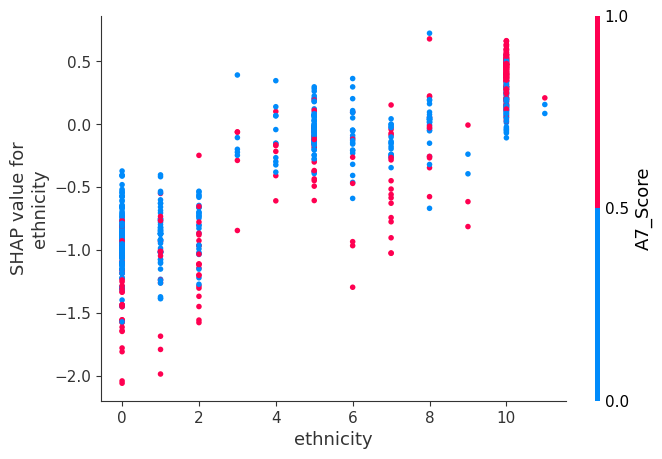

In [22]:
custom_x_labels = df_raw.replace("?", np.nan)["ethnicity"].value_counts().index
exp.dependence_plot("ethnicity")

In [9]:
y.value_counts()

Class/ASD
0.0    639
1.0    161
Name: count, dtype: int64

## Force Plot

In [ ]:
shap.initjs()

In [23]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values)